# Thư viện

In [1]:
import glob
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Tải dữ liệu

In [2]:
path_to_items = "data/sales_pers.item_chunk_0.parquet"
path_to_purchases = "data/sales_pers.purchase_history_daily_chunk_*.parquet"
path_to_users = "data/sales_pers.user_chunk_*.parquet"
path_to_items_purchases = "joined_data/item_purchase.parquet"
path_to_users_purchases = "joined_data/user_purchase.parquet"
path_to_full = "joined_data/full.parquet"
path_to_orders_summary = "joined_data/orders_summary.parquet"

item_df = pl.scan_parquet(path_to_items)
user_df = pl.scan_parquet(glob.glob(path_to_users))
purchase_df = pl.scan_parquet(glob.glob(path_to_purchases))

item_purchase_df = pl.scan_parquet(path_to_items_purchases)
user_purchase_df = pl.scan_parquet(path_to_users_purchases)
full_df = pl.scan_parquet(path_to_full)
orders_summary_df = pl.scan_parquet(path_to_orders_summary)


# Khám phá

## Null count

In [6]:
def null_count(df):
    row_count = (
            df.select(
                pl.len()
            )
        ).collect().item()
    print(f"{row_count} entries")
    print('% Không xác định')
    for c in df.collect_schema().names():
        null1_count = (
            df.select(
                (pl.col(c).cast(pl.Utf8) == 'Không xác định').sum()
            )
        ).collect().item()
        null2_count = (
            df.select(
                (pl.col(c).is_null()).sum()
            )
        ).collect().item()
        null_percent = (null1_count+null2_count)/row_count*100
        if (null_percent > 0):
            print(f"{c}: {null_percent:.2f}%")

In [8]:
null_count(item_df)

27332 entries
% Không xác định
description: 68.16%
brand: 20.05%
manufacturer: 94.27%
sync_status_id: 2.88%
last_sync_date: 2.88%
sync_error_message: 100.00%
image_url: 100.00%
gender_target: 66.00%
age_group: 57.85%
item_type: 35.93%
weight: 100.00%
color: 97.35%
size: 91.86%
origin: 82.79%
volume: 98.69%
material: 90.24%
description_new: 65.23%


In [11]:
null_count(user_df)

4573964 entries
% Không xác định
sync_status_id: 7.40%
last_sync_date: 7.40%
sync_error_message: 100.00%
install_app: 0.00%


In [13]:
null_count(purchase_df)

35729825 entries
% Không xác định
channel: 0.00%
payment: 0.93%


## Describe

In [14]:
item_df.describe()

statistic,p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,str,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,f64,f64,str,str,str,str,str,f64,str
"""count""",27332.0,"""27332""",27332.0,27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""","""27332""","""27332""","""27332""",27332.0,27332.0,"""27332""","""27332""",26546.0,"""26546""","""0""","""27332""","""27332""","""27332""","""27332""",27332.0,0.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,"""22317"""
"""null_count""",0.0,"""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",786.0,"""786""","""27332""","""0""","""0""","""0""","""0""",0.0,27332.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""5015"""
"""mean""",106317.679643,null,190456.829467,2836.189192,null,3719.039843,null,4876.768294,null,4920.712718,null,null,null,null,1.6225e9,0.0,"""2021-05-31 17:17:33.849833""","""2025-08-30 04:07:07.766157""",2.0,"""2025-07-18 18:00:25.086391""",null,null,null,null,null,49696.651226,null,null,null,null,null,null,0.167203,null
"""std""",25425.734073,null,511123.971813,1417.521137,null,1935.042044,null,2035.952741,null,1999.308355,null,null,null,null,7.5666e7,null,null,null,0.0,null,null,null,null,null,null,144155.68753,null,null,null,null,null,null,0.373164,null
"""min""",1675.0,"""0000280000019""",0.0,1.0,"""Babycare""",2.0,"""0-1Y""",14.0,"""A2 milk""",4.0,"""0-12M Bodysuit bé trai đùi""","""Với kiểu dáng đơn giản nhưng …","""137 Degrees""","""(L) Địa điểm kinh doanh 1 - Ch…",1.2983e9,0.0,"""2011-02-21 11:54:02.047000""","""2023-12-26 17:21:11.663000""",2.0,"""2025-07-18 17:59:29.898256""",null,"""Không xác định""","""Bé Gái""","""0-10M""","""BCS""",0.0,null,"""Bạc""","""0 tháng""",""" Singapore, Thụy Sĩ""","""1 lít""",""" Vải không dệt, bông cellulose…",0.0,"""Chi tiết sản phẩm …"
"""25%""",88905.0,null,49000.0,2788.0,null,2038.0,null,3516.0,null,3522.0,null,null,null,null,1.5755e9,null,"""2019-12-04 18:24:16.260000""","""2025-08-18 09:59:19.847000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,0.0,null,null,null,null,null,null,0.0,null
"""50%""",104510.0,null,119000.0,3292.0,null,3958.0,null,5254.0,null,5511.0,null,null,null,null,1.6358e9,null,"""2021-11-01 13:19:26.080000""","""2025-09-26 08:05:23.153000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,25047.0,null,null,null,null,null,null,0.0,null
"""75%""",120262.0,null,199000.0,3292.0,null,4571.0,null,6984.0,null,6988.0,null,null,null,null,1.6699e9,null,"""2022-12-01 15:40:42.260000""","""2025-09-27 00:05:36.233000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,65532.0,null,null,null,null,null,null,0.0,null
"""max""",167147.0,"""7497000000006""",2.099e7,7376.0,"""Đồ chơi & Sách""",7492.0,"""Đồ uống""",7493.0,"""Đồ hộp""",7501.0,"""Động vật mô hình""","""﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿Bỉm …","""Đức Thành""","""﻿Shantou City Chenghai Jia Ron…",1.7559e9,0.0,"""2025-08-22 17:35:14.377000""","""2025-10-01 08:05:42.990000""",2.0,"""2025-07-21 10:59:04.045058""",null,"""Không xác định""","""Unisex""","""[""Từ 6M"", ""Từ 9M"", ""Từ 1Y""]""","""Ứng dụng mẹ và bé""",5.54136e6,null,"""Đỏ""","""XXL(15-25kg) - 26 miếng""","""Ấn Độ, Bulgaria""","""hộp 3 lọ x 250ml""","""﻿100% cotton﻿<br>""",1.0,"""Xin lỗi, nhưng tôi không thể t…"


In [15]:
user_df.describe()

statistic,customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
str,f64,str,f64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,str,f64
"""count""",4.573964e6,"""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.235679e6,"""4235679""","""0""","""4573964""","""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6
"""null_count""",0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",338285.0,"""338285""","""4573964""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0
"""mean""",6.1266e6,null,554.053518,null,null,1.6712e9,"""2022-12-16 22:48:44.025646""","""2025-06-11 05:52:40.770554""",2.0,"""2025-07-16 15:20:34.188640""",null,null,null,null,1.6841e9,null,null,0.0
"""std""",2.4412e6,null,295.523361,null,null,7.9743e7,null,null,0.0,null,null,null,null,null,7.1374e7,null,null,null
"""min""",14732.0,"""Khác""",42.0,"""An Giang""","""Diamond""",1.3064e9,"""2011-05-25 21:11:51.677000""","""2019-06-30 08:38:47.100000""",2.0,"""2025-07-16 11:54:29.816986""",null,"""Bắc Trung Bộ""","""AGI - 110 Quốc Lộ 91""","""Android""",1.3063e9,""" Vũng Liêm""","""000004697bc1f0ecab42b6a3c2f0bc…",0.0
"""25%""",4.53268e6,null,302.0,null,null,1.6343e9,"""2021-10-15 10:09:34.280000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 11:58:58.022193""",null,null,null,null,1.6550e9,null,null,null
"""50%""",6.843955e6,null,547.0,null,null,1.6960e9,"""2023-09-29 16:33:25.217000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 12:03:34.550186""",null,null,null,null,1.7054e9,null,null,null
"""75%""",8.029649e6,null,765.0,null,null,1.7312e9,"""2024-11-09 14:38:22.223000""","""2025-08-02 10:54:03.860000""",2.0,"""2025-07-16 12:11:53.888687""",null,null,null,null,1.7366e9,null,null,null
"""max""",9.264159e6,"""Nữ""",1310.0,"""Đồng Tháp""","""Standard""",1.7593e9,"""2025-09-30 22:00:36.623000""","""2025-09-30 23:22:08.957000""",2.0,"""2025-07-21 11:19:29.058389""",null,"""Đồng bằng sông Cửu Long""","""ĐTH - Trần Hưng Đạo""","""iOS""",1.7592e9,"""Ứng Hòa""","""fffffbd469d500229dd000e9fc48ed…",0.0


In [16]:
purchase_df.describe()

statistic,timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
str,f64,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64
"""count""",3.5729825e7,"""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,3.5729825e7,3.5729825e7,3.5729825e7,"""35729825""","""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,3.5729825e7
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",1.7199e9,null,null,null,1.508098,169188.742494,2.0241e7,1.508098,4.8713e6,"""2024-07-02 17:13:24.220955""","""2024-07-02 18:27:59.561504""",null,null,448.414508,17235.651914,0.0
"""std""",9.1568e6,null,null,null,2.264976,195539.88976,346.231465,2.264976,2.2697e6,null,null,null,null,247.505432,46673.708499,null
"""min""",1.7041e9,"""0000063a29e92d643437aa09266fdc…","""0000280000019""","""Purchase""",1.0,0.0444,2.0240101e7,1.0,14732.0,"""2024-01-01 06:44:59.037000""","""2024-01-01 06:44:59.233000""","""Android""","""Chuyển khoản""",16.0,0.0,0.0
"""25%""",1.7120e9,null,null,null,1.0,48316.3914,2.0240401e7,1.0,3.06641e6,"""2024-04-01 16:44:10.513000""","""2024-04-01 17:15:12.017000""",null,null,234.0,0.0,null
"""50%""",1.7199e9,null,null,null,1.0,87000.0,2.0240702e7,1.0,5.373736e6,"""2024-07-02 19:06:52.293000""","""2024-07-02 19:42:24.550000""",null,null,439.0,0.0,null
"""75%""",1.7279e9,null,null,null,1.0,244000.0,2.0241002e7,1.0,6.853734e6,"""2024-10-02 19:55:22.447000""","""2024-10-02 20:24:53.813000""",null,null,653.0,15000.0,null
"""max""",1.7357e9,"""fffff7e197ebf5c523fa686e6a305c…","""7352000000004""","""Purchase""",240.0,2.099e7,2.0241231e7,240.0,8.208027e6,"""2024-12-31 22:35:19.510000""","""2025-09-27 21:25:22.960000""","""iOS""","""ZaloPay""",1036.0,7.995e6,0.0


## Fetch(5)

In [6]:
item_df.fetch(5)

C:\Users\LINEAGE\AppData\Local\Temp\ipykernel_15972\1339878373.py:1: DeprecationWarning: `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  item_df.fetch(5)


p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
i32,str,"decimal[38,4]",i32,str,i32,str,i32,str,i32,str,str,str,str,i64,bool,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,str,"decimal[38,4]",f32,str,str,str,str,str,i32,str
17065,"""0502020000004""",99000.0000,1,"""Babycare""",35,"""Bình sữa, phụ kiện""",7050,"""Núm ty""",7058,"""Núm ty Dr Brown""","""Không xác định""","""Dr.Brown's""","""Không xác định""",1333531544,false,2012-04-04 09:25:44.240,2025-08-18 09:59:19.847,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",36828.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
72370,"""0010290040150""",69000.0000,3292,"""Thời trang""",3958,"""Cơ cấu hàng cũ""",7007,"""Thời trang bé trai, bé gái cũ""",6987,"""Bộ quần áo bé gái""","""Không xác định""","""Con Cưng""","""Không xác định""",1503046250,false,2017-08-18 08:50:50.713,2025-09-18 16:05:42.360,null,null,null,"""Không xác định""","""Bé Gái""","""Từ 3Y""","""Bộ quần áo""",0.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Không xác định"""
31154,"""0008010000015""",45000.0000,351,"""Đồ chơi & Sách""",2033,"""0-1Y""",2118,"""Gặm nướu""",2121,"""Gặm nướu khác""","""- Chất liệu: Sản phẩm được làm…","""Thương hiệu khác""","""Không xác định""",1358501584,false,2013-01-18 09:33:04.260,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",14490.0000,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",0,"""Chi tiết sản phẩm …"
46123,"""0020010000094""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2276,"""Merries_Sơ Sinh""","""﻿﻿Tã dán Merries size S 82 miế…","""Merries Nhật""","""Không xác định""",1400062039,false,2014-05-14 10:07:19.603,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",59749.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""
46127,"""0020010000098""",401000.0000,2222,"""Tã""",2272,"""Merries""",2275,"""Merries""",2278,"""Merries_Tã Quần""","""﻿﻿﻿Bỉm tã quần Merries size M …","""Merries Nhật""","""Không xác định""",1400062040,false,2014-05-14 10:07:20.370,2025-09-27 00:05:36.233,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Không xác định""","""Không xác định""","""Không xác định""",65764.0000,null,"""Không xác định""","""Không xác định""","""Nhật Bản, Nhật Bản""","""Không xác định""","""Giấy, bột giấy, vải không dệt,…",0,"""Không xác định"""


In [7]:
user_df.fetch(5)

C:\Users\LINEAGE\AppData\Local\Temp\ipykernel_15972\319342226.py:1: DeprecationWarning: `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  user_df.fetch(5)


customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
i32,str,i32,str,str,i64,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,i64,str,str,bool
14732,"""Nam""",155,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - Grand View Phú Mỹ Hưng""","""In-Store""",1306281600,"""7""","""e1e48206652bf8c279ff0206c69a80…",false
15126,"""Nữ""",300,"""Hồ Chí Minh""","""Standard""",1306357911,2011-05-25 21:11:51.677,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 121A Nguyễn Duy Trinh""","""In-Store""",1306281600,"""Thủ Đức""","""77891759204bd27e69fb11a7b92889…",false
29718,"""Nữ""",157,"""Bến Tre""","""Standard""",1312126692,2011-07-31 15:38:12.750,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đồng bằng sông Cửu Long""","""BTR - 179 Nguyễn Đình Chiểu""","""In-Store""",1582070400,"""Bến Tre""","""b8041b584a0bb6655361727a0a6108…",false
30077,"""Nữ""",53,"""Hồ Chí Minh""","""Standard""",1314302782,2011-08-25 20:06:22.797,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 101 Trần Quang Khải""","""In-Store""",1314230400,"""1""","""c52ceaca44a83ec41a219cfaff0e05…",false
30085,"""Nữ""",660,"""Hồ Chí Minh""","""Standard""",1314310024,2011-08-25 22:07:04.267,2025-07-07 15:33:10.201316,2,2025-07-16 11:54:29.816986,null,"""Đông Nam Bộ""","""HCM - 85-87 Tây Thạnh""","""In-Store""",1314230400,"""Tân Phú""","""74ac5764f5d67d341aacf238d7762f…",false


In [8]:
purchase_df.fetch(5)

C:\Users\LINEAGE\AppData\Local\Temp\ipykernel_15972\2648634926.py:1: DeprecationWarning: `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  purchase_df.fetch(5)


timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
i64,str,str,str,"decimal[38,4]","decimal[38,4]",i32,i32,i32,datetime[μs],datetime[μs],str,str,i32,"decimal[38,4]",bool
1735064221,"""ca12702ddf55acaa9fb767e10faaa6…","""7115000000004""","""Purchase""",1.0000,49000.0000,20241224,1,5254214,2024-12-24 18:17:01.027,2024-12-24 18:20:09.453,"""In-Store""","""VietQR""",656,0.0000,false
1735068481,"""54314ce86269f4849f9a4c3fc85d94…","""0029130000030""","""Purchase""",1.0000,69000.0000,20241224,1,7573232,2024-12-24 19:28:01.870,2024-12-24 19:28:01.870,"""In-Store""","""Tiền mặt""",143,0.0000,false
1735069843,"""4799de4022b58689b2b9fb37122479…","""3496000000053""","""Purchase""",2.0000,75000.0000,20241224,2,8187418,2024-12-24 19:50:43.760,2024-12-24 19:50:43.760,"""In-Store""","""MoMo""",213,0.0000,false
1735069779,"""4799de4022b58689b2b9fb37122479…","""2700000000002""","""Purchase""",2.0000,58500.0000,20241224,2,8187418,2024-12-24 19:49:39.223,2024-12-24 19:49:39.223,"""In-Store""","""MoMo""",213,13000.0000,false
1735379373,"""3b2423f730815273dfd6f6220b0c5c…","""0029110000036""","""Purchase""",1.0000,89000.0000,20241228,1,6931560,2024-12-28 09:49:33.780,2024-12-28 10:28:49.413,"""Android""","""MoMo""",590,10000.0000,false


In [15]:
item_df.filter(
    pl.col('item_id') == '3496000000053'
).collect()

p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
i32,str,"decimal[38,4]",i32,str,i32,str,i32,str,i32,str,str,str,str,i64,bool,datetime[μs],datetime[μs],i32,datetime[μs],str,str,str,str,str,"decimal[38,4]",f32,str,str,str,str,str,i32,str
138939,"""3496000000053""",75000.0000,3292,"""Thời trang""",3479,"""Quần áo & Phụ kiện sơ sinh""",3490,"""Bao tay chân, nón""",3496,"""Bộ nón bao tay chân""","""﻿﻿Set 3 nón bao tay chân Animo…","""Animo""","""Không xác định""",1722620367,false,2024-08-02 17:39:27.010,2025-09-26 22:05:03.940,2,2025-07-18 17:59:29.898256,null,"""Không xác định""","""Sơ sinh""","""Từ 0M""","""Bao tay, bao chân""",45915.0000,null,"""Không xác định""","""Không xác định""","""Việt Nam""","""Không xác định""","""100% cotton""",1,"""Không xác định"""


# EDA

## Phân tích đơn biến

### Item

<Axes: xlabel='count', ylabel='category_l1'>

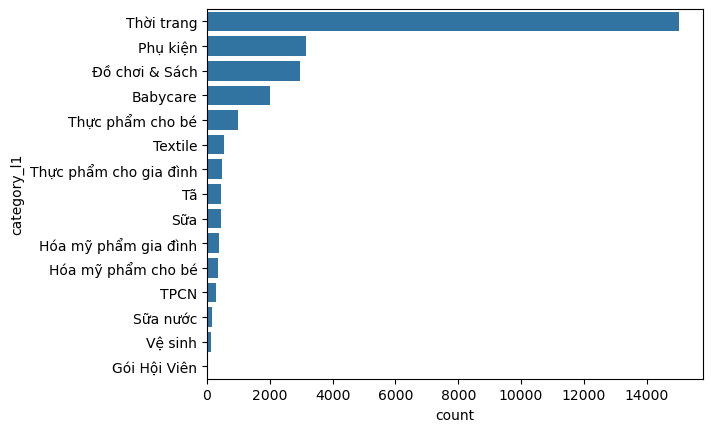

In [ ]:
pd = item_df.select(pl.col('category_l1')).collect().to_pandas()
order = pd['category_l1'].value_counts().index
sns.countplot(y=pd['category_l1'], order=order)

<Axes: xlabel='count', ylabel='grouped_brand'>

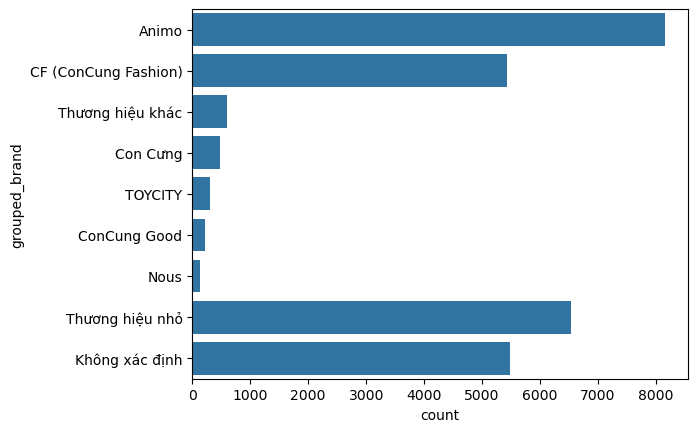

In [49]:
pd = item_df.select(pl.col('brand')).collect().to_pandas()
brand_counts = pd['brand'].value_counts()
threshold = len(pd) * 0.005
small_brands_index = brand_counts[brand_counts < threshold].index
pd['grouped_brand'] = pd['brand'].replace(small_brands_index, 'Thương hiệu nhỏ')
order = pd['grouped_brand'].value_counts().drop(['Thương hiệu nhỏ', 'Không xác định']).index.tolist() + ['Thương hiệu nhỏ', 'Không xác định']
sns.countplot(y=pd['grouped_brand'], order=order)

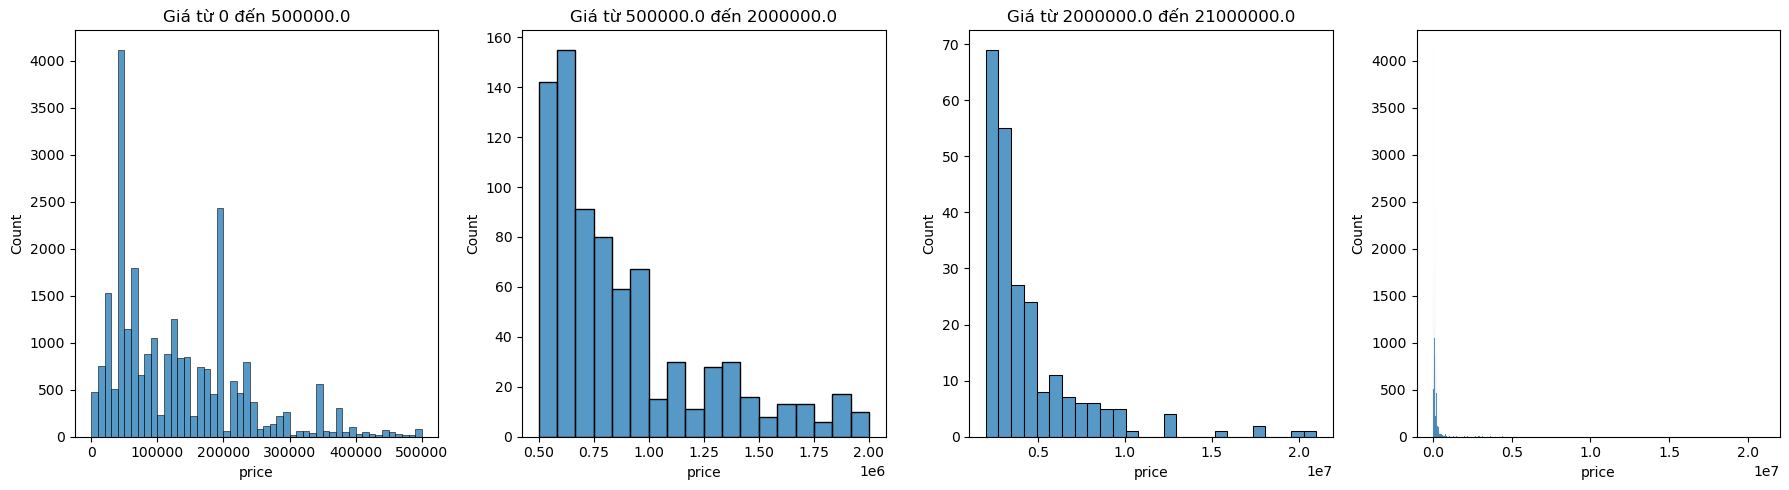

In [50]:
pd = item_df.select(pl.col('price')).collect().to_pandas()

ranges = [(0, 5e5), (5e5, 2e6), (2e6, 2.1e7)]
fig, axes = plt.subplots(ncols=len(ranges)+1, figsize=(18, 5))

for ax, (lower_bound, upper_bound) in zip(axes, ranges):
    sns.histplot(x=pd['price'], binrange=(lower_bound, upper_bound), ax=ax)
    ax.set_title(f'Giá từ {lower_bound} đến {upper_bound}')
sns.histplot(x=pd['price'])

plt.tight_layout()
plt.show()

Số lượng 'Unisex': 6


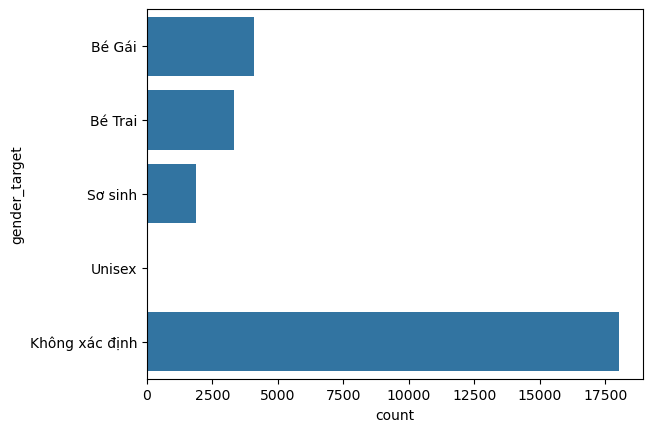

In [53]:
pd = item_df.select(pl.col('gender_target')).collect().to_pandas()
order = pd['gender_target'].value_counts().drop('Không xác định').index.tolist() + ['Không xác định']
sns.countplot(y=pd['gender_target'], order=order)

print(f"Số lượng 'Unisex': {len(pd[pd['gender_target'] == 'Unisex'])}")

### User

Số lượng giới tính 'Khác': 8


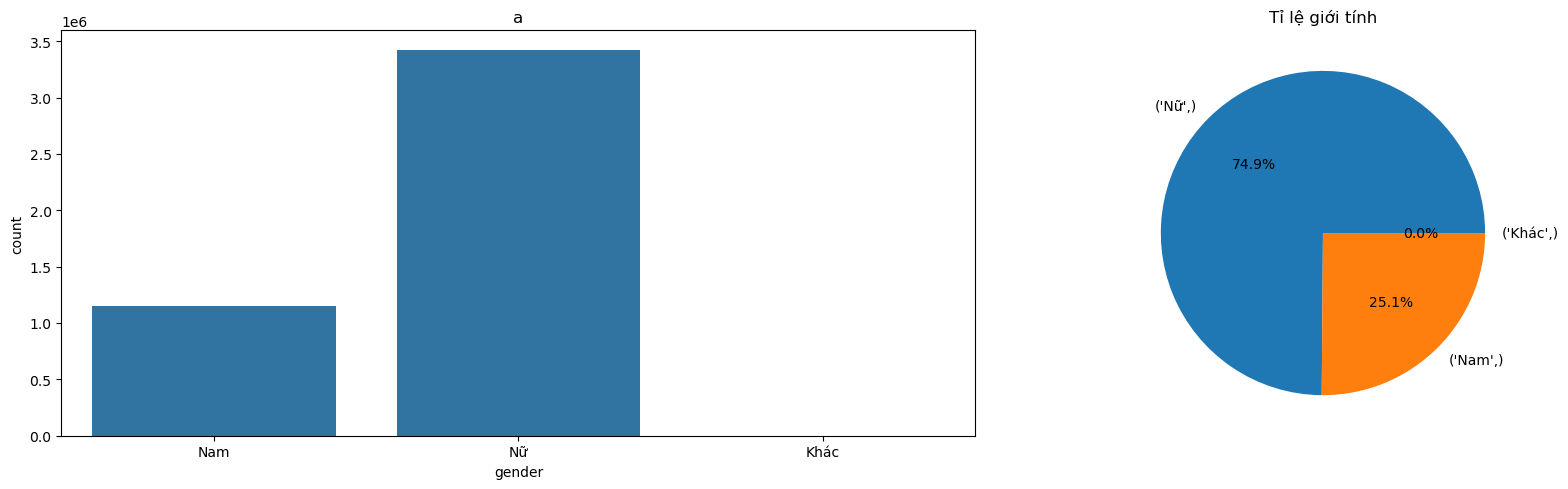

In [ ]:
pd = user_df.select(pl.col('gender')).collect().to_pandas()
print(f"Số lượng giới tính 'Khác': {len(pd[pd['gender'] == 'Khác'])}")

data = pd.value_counts()
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))

sns.countplot(x=pd['gender'], ax = axes[0])
axes[1].pie(data, labels=data.index, autopct='%1.1f%%')
axes[1].set_title('Tỉ lệ giới tính')

plt.tight_layout()
plt.show()

Số lượng user ở 'Duyên hải Bắc Bộ': 4383


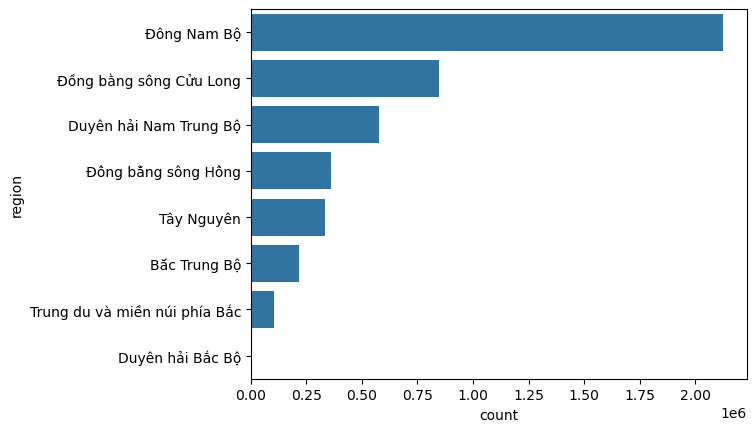

In [13]:
pd = user_df.select(pl.col('region')).collect().to_pandas()

order = pd['region'].value_counts().index
sns.countplot(y=pd['region'], order=order)
print(f"Số lượng user ở 'Duyên hải Bắc Bộ': {len(pd[pd['region'] == 'Duyên hải Bắc Bộ'])}")

<Axes: xlabel='count', ylabel='grouped_province'>

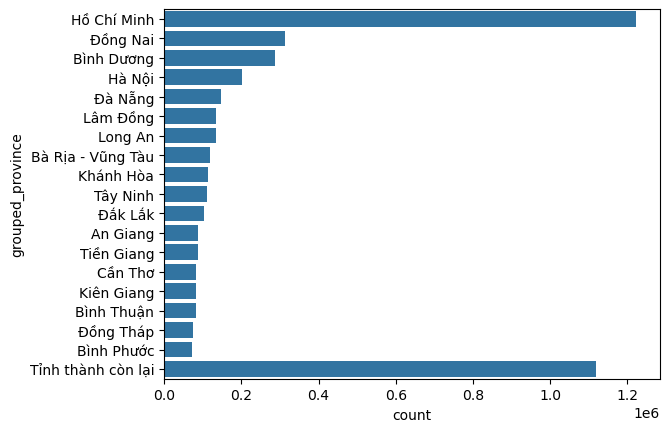

In [15]:
pd = user_df.select(pl.col('province')).collect().to_pandas()

province_order = pd['province'].value_counts()
threshold = len(pd) * 0.015
small_province_index = province_order[province_order < threshold].index
pd['grouped_province'] = pd['province'].replace(small_province_index, 'Tỉnh thành còn lại')
order = pd['grouped_province'].value_counts().drop('Tỉnh thành còn lại').index.tolist() + ['Tỉnh thành còn lại']
sns.countplot(y=pd['grouped_province'], order=order)

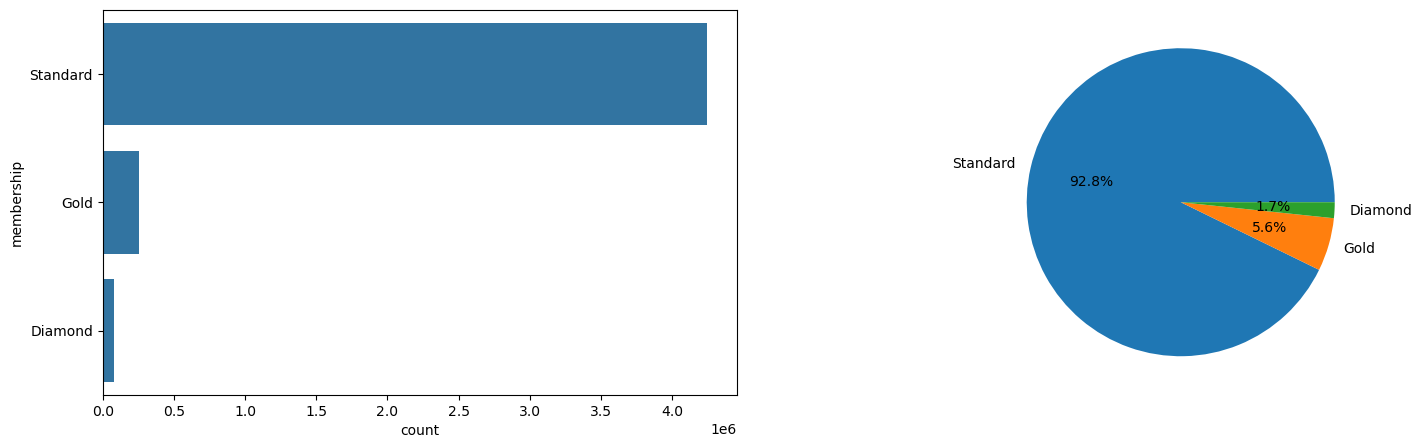

In [7]:
pd = user_df.select(pl.col('membership')).collect().to_pandas()

fig, axes = plt.subplots(ncols=2, figsize=(18, 5))

membership_count = pd['membership'].value_counts()
sns.countplot(y=pd['membership'], order=membership_count.index, ax=axes[0])
axes[1].pie(membership_count, labels=membership_count.index, autopct='%1.1f%%')

plt.show()

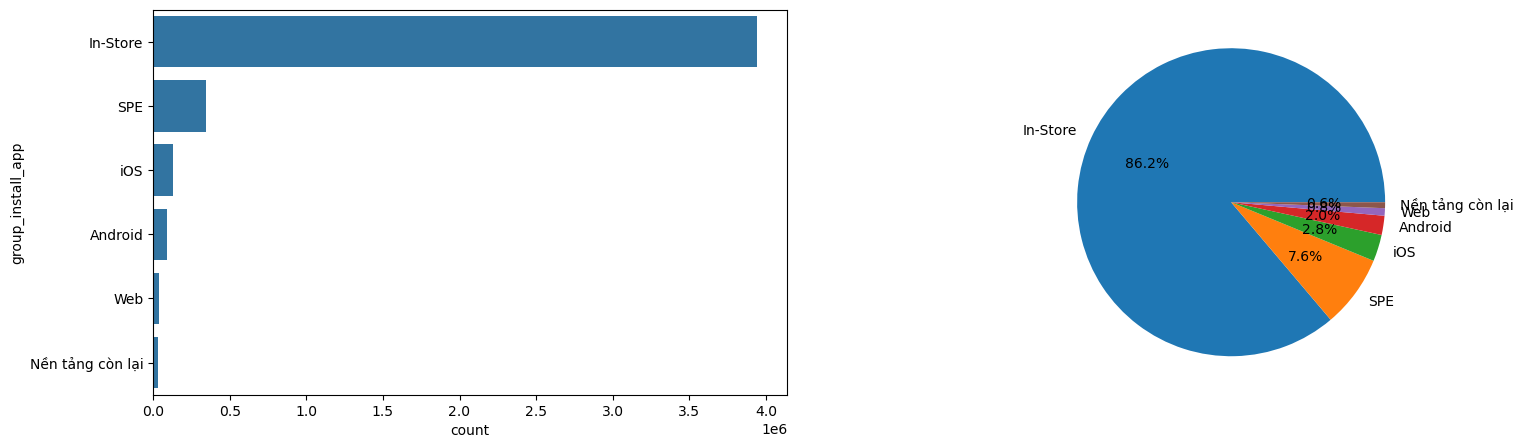

In [3]:
pd = user_df.select(pl.col('install_app')).collect().to_pandas()

fig, axes = plt.subplots(ncols=2, figsize=(18, 5))

install_app_count = pd['install_app'].value_counts()
threshold = len(pd) * 0.005
small_install_app_index = install_app_count[install_app_count < threshold].index
pd['group_install_app'] = pd['install_app'].replace(small_install_app_index, 'Nền tảng còn lại')
group_install_app_count = pd['group_install_app'].value_counts()
sns.countplot(y=pd['group_install_app'], order=group_install_app_count.index, ax=axes[0])

axes[1].pie(group_install_app_count, labels=group_install_app_count.index, autopct="%1.1f%%")
plt.show()

### Purchase

<Axes: xlabel='quantity_range', ylabel='count'>

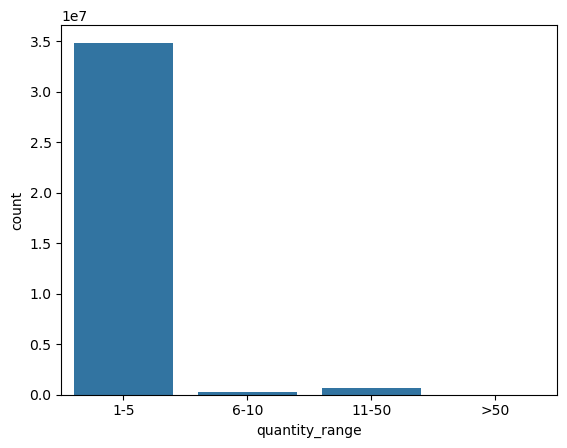

In [ ]:
pd = purchase_df.select(pl.col('quantity')).with_columns(
    pl.when(pl.col('quantity') <= 5).then(pl.lit("1-5"))
      .when(pl.col('quantity') <= 10).then(pl.lit("6-10"))
      .when(pl.col('quantity') <= 50).then(pl.lit("11-50"))
      .otherwise(pl.lit('>50'))
      .alias("quantity_range")
).collect().to_pandas()


sns.countplot(x=pd['quantity_range'])


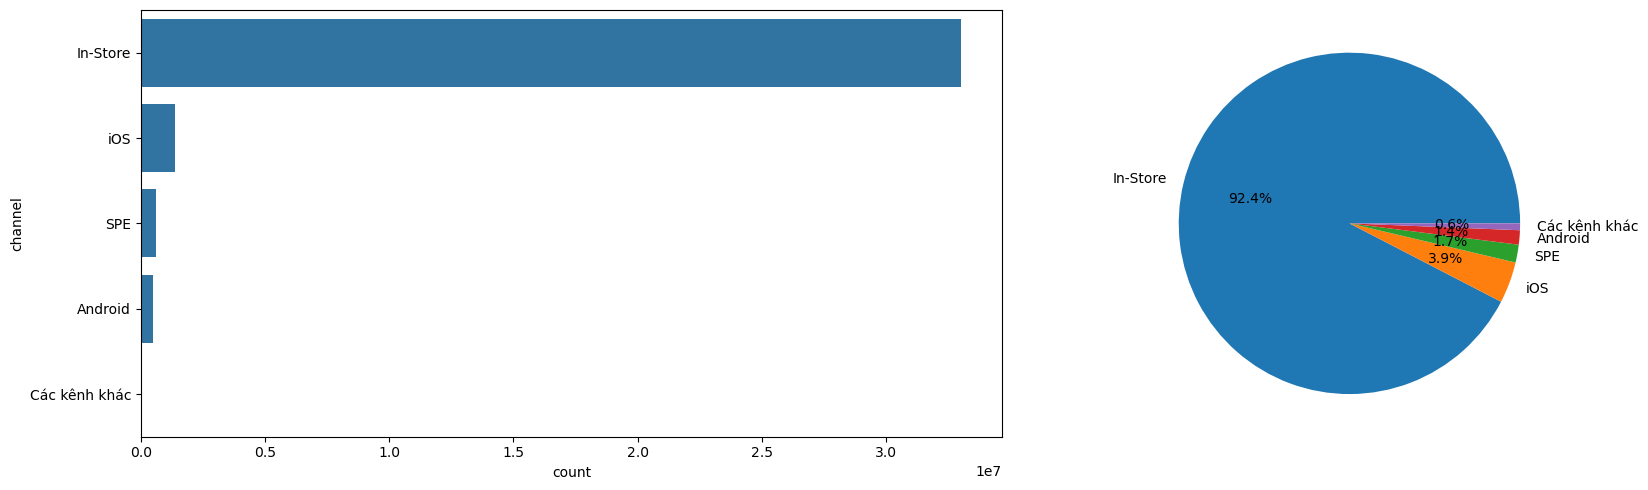

In [4]:
pd = purchase_df.select(pl.col('channel')).collect().to_pandas()

fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
channel_count = pd['channel'].value_counts()
threshold = len(pd) * 0.005
small_channel_index = channel_count[channel_count < threshold].index
pd['group_channel'] = pd['channel'].replace(small_channel_index, 'Các kênh khác')
group_channel_count = pd['group_channel'].value_counts()
sns.countplot(y=pd['channel'], order=group_channel_count.index, ax=axes[0])
axes[1].pie(group_channel_count, labels=group_channel_count.index, autopct='%1.1f%%')

plt.tight_layout()
plt.show()

payment
Tiền mặt          22454572
VietQR             5766946
Cà thẻ             4040302
VNPay              2080460
MoMo                747996
Không xác định      331952
ZaloPay             242983
ShopeePay            45508
Kredivo              19044
Chuyển khoản            62
Name: count, dtype: int64

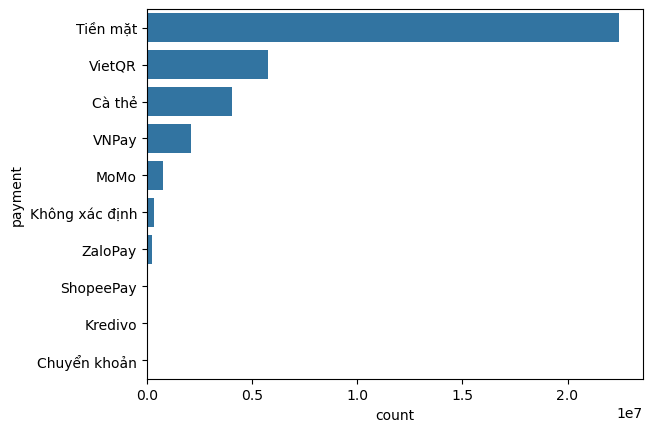

In [3]:
pd = purchase_df.select(pl.col('payment')).collect().to_pandas()

payment_count = pd['payment'].value_counts()
sns.countplot(y=pd['payment'], order=payment_count.index)

payment_count

In [9]:
pd = purchase_df.select(pl.col('discount')).filter(
    pl.col('discount') < 1000,
    pl.col('discount') > 0
).collect()
pd

discount
"decimal[38,4]"
628.7839
885.4304
865.9218
897.9645
309.8038
…
610.3212
894.9738
763.0451


Tỉ lệ không giảm giá (discount = 0): 59.73%


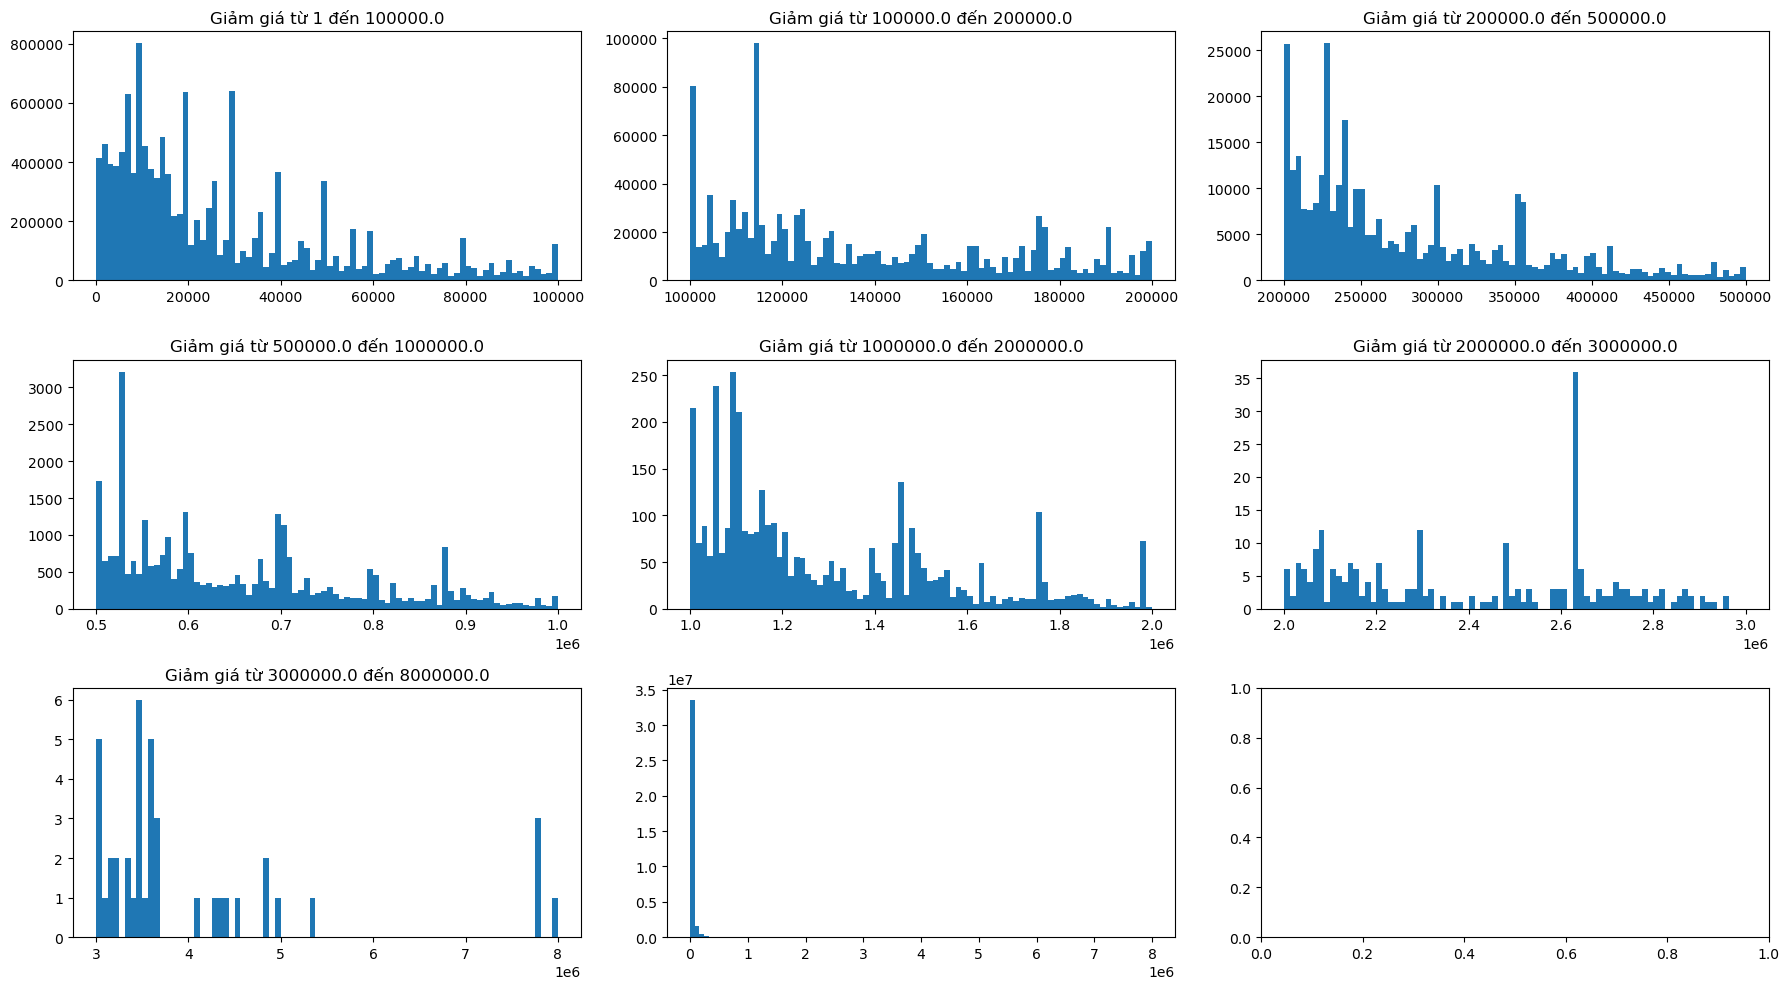

In [27]:
pd = purchase_df.select(pl.col('discount')).collect()
percent_discount_0 = pd.filter(pl.col('discount') == 0).height/pd.height*100
print(f"Tỉ lệ không giảm giá (discount = 0): {percent_discount_0:.2f}%")
pd = pd.to_series().to_numpy()

ranges = [(1, 1e5), (1e5, 2e5), (2e5, 5e5), (5e5, 1e6), (1e6, 2e6), (2e6, 3e6), (3e6, 8e6)]
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()
for ax, binrange in zip(axes[:-2], ranges):
    ax.hist(x=pd, range=binrange, bins=80)
    ax.set_title(f"Giảm giá từ {binrange[0]} đến {binrange[1]}")
axes[-2].hist(x=pd, bins=100)

plt.tight_layout()
plt.show()

## Phân tích đa biến

### Hợp nhất dữ liệu

In [3]:
purchase_df = purchase_df.with_columns(
    (pl.col('price') * pl.col('quantity')).alias('total_value')
)

user_purchase_df = purchase_df.join(
    user_df,
    on='user_id',
    how='inner',
    suffix='_user'
)

item_purchase_df = purchase_df.join(
    item_df,
    on='item_id',
    how='inner',
    suffix='_item'
)

full_df = item_purchase_df.join(
    user_df,
    on='user_id',
    how='inner',
    suffix='_user'
)

In [4]:
user_purchase_df.sink_parquet("joined_data/user_purchase.parquet")
item_purchase_df.sink_parquet("joined_data/item_purchase.parquet")
full_df.sink_parquet("joined_data/full.parquet")

#### Bảng số loại món hàng và giá tiền của mỗi đơn hàng theo từng giao dịch mua hàng

In [ ]:
orders_summary_df = (
    user_purchase_df.select(
        pl.col(['timestamp', 'customer_id', 'item_id', 'price', 'quantity', 'gender', 'membership', 'region'])
    )
    .group_by(
        pl.col(['timestamp', 'customer_id', 'gender', 'membership', 'region'])
    )
    .agg(
        (pl.col('price') * pl.col('quantity')).sum().alias('total_price'),
        pl.col('item_id').n_unique().alias('n_item')
    )
)

In [ ]:
orders_summary_df.sink_parquet("joined_data/orders_summary.parquet")

### User + Purchase

#### Số tiền mua ở mỗi đơn hàng theo membership

<Axes: xlabel='membership', ylabel='total_price'>

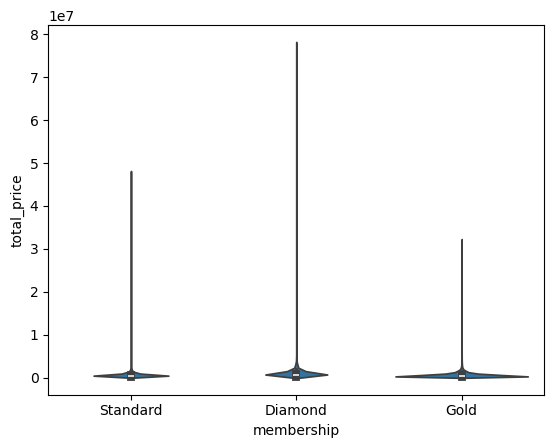

In [3]:
df = (
    orders_summary_df.select(
        pl.col([
            'membership',
            'total_price',
        ])
    )
    .collect()
)
sns.violinplot(data=df, x='membership', y='total_price')

<Axes: xlabel='membership', ylabel='total_price'>

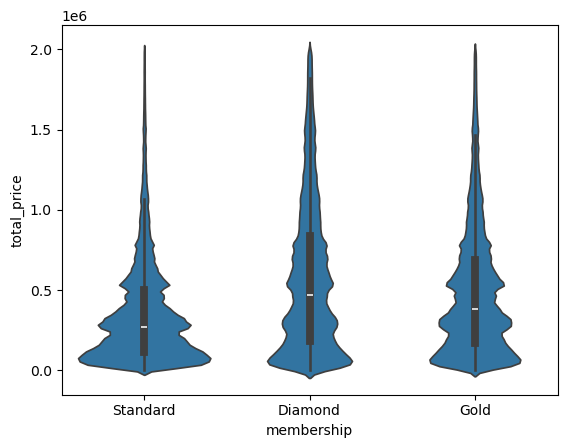

In [5]:
df = (
    orders_summary_df.select(
        pl.col([
            'membership',
            'total_price',
        ])
    )
    .filter(
        pl.col('total_price') < 2e6
    )
    .collect()
)
sns.violinplot(data=df, x='membership', y='total_price')

#### Số lượng hàng mua ở mỗi đơn hàng theo membership

<Axes: xlabel='membership', ylabel='n_item'>

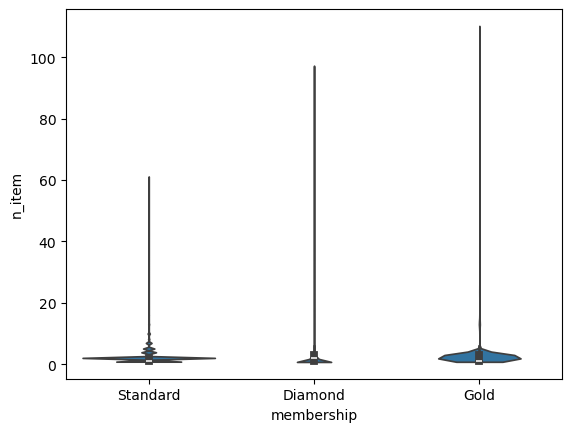

In [7]:
df = (
    orders_summary_df.select(
        pl.col([
            'membership',
            'n_item',
        ])
    )
    .collect()
)
sns.violinplot(data=df, x='membership', y='n_item')

<Axes: xlabel='membership', ylabel='n_item'>

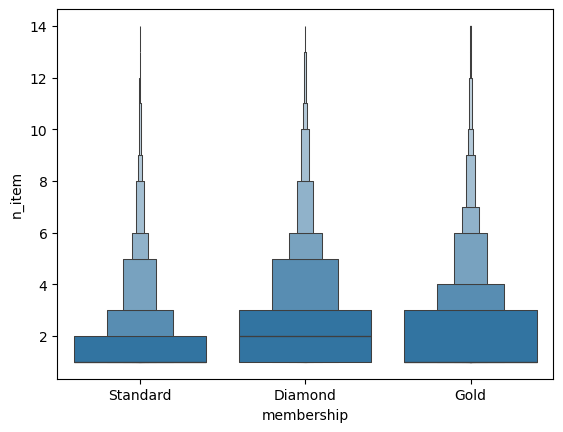

In [ ]:
df = (
    orders_summary_df.select(
        pl.col([
            'membership',
            'n_item',
        ])
    )
    .filter(
        pl.col('n_item') < 15
    )
    .collect()
)
sns.boxenplot(data=df, x='membership', y='n_item')


#### Số tiền mua ở mỗi đơn hàng theo giới tính

<Axes: xlabel='gender', ylabel='total_price'>

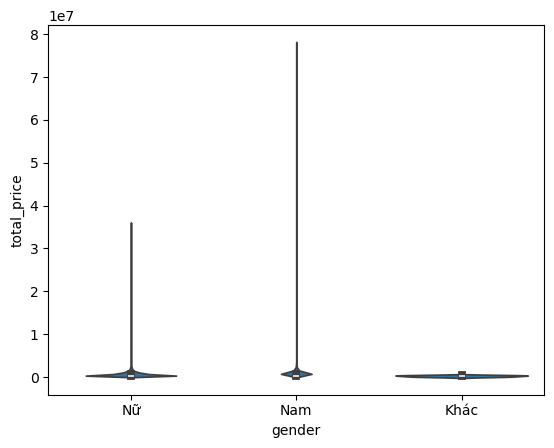

In [3]:
df = (
    orders_summary_df.select(
        pl.col([
            'gender',
            'total_price',
        ])
    )
    .collect()
)
sns.violinplot(data=df, x='gender', y='total_price')

<Axes: xlabel='gender', ylabel='total_price'>

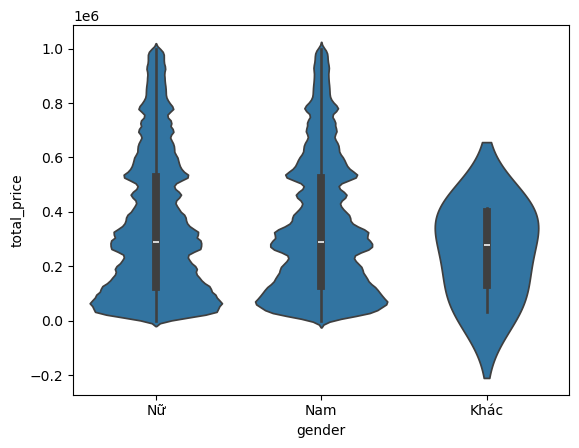

In [4]:
df = (
    orders_summary_df.select(
        pl.col([
            'gender',
            'total_price',
        ])
    )
    .filter(
        pl.col('total_price') < 1e6
    )
    .collect()
)
sns.violinplot(data=df, x='gender', y='total_price')

#### Số lượng hàng mua ở mỗi đơn hàng theo giới tính

<Axes: xlabel='gender', ylabel='n_item'>

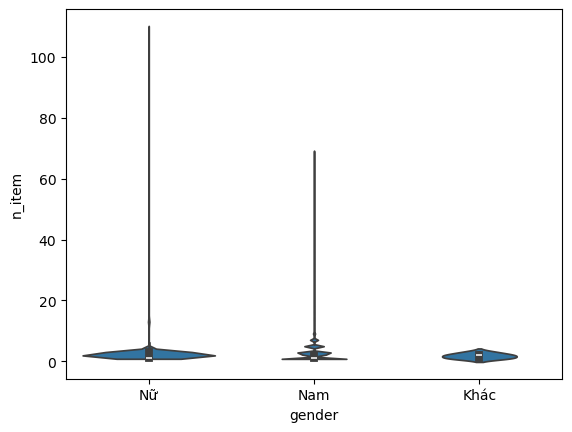

In [5]:
df = (
    orders_summary_df.select(
        pl.col([
            'gender',
            'n_item',
        ])
    )
    .collect()
)
sns.violinplot(data=df, x='gender', y='n_item')

<Axes: xlabel='gender', ylabel='n_item'>

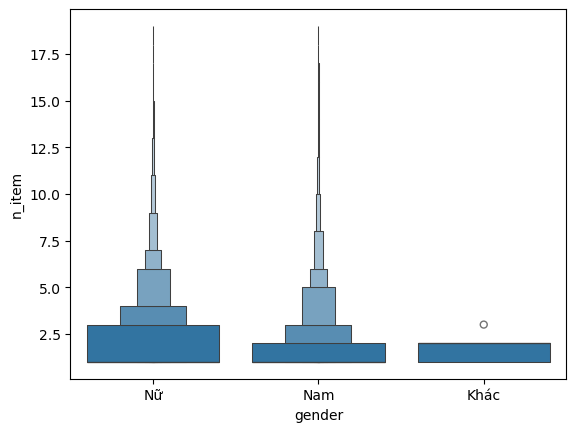

In [6]:
df = (
    orders_summary_df.select(
        pl.col([
            'gender',
            'n_item',
        ])
    )
    .filter(
        pl.col('n_item') < 20
    )
    .collect()
)
sns.boxenplot(data=df, x='gender', y='n_item')

### Item + Purchase

#### Mối quan hệ giữa giá tiền sản phẩm và số lượng được mua trong một lần mua hàng

<Axes: xlabel='quantity', ylabel='price_item'>

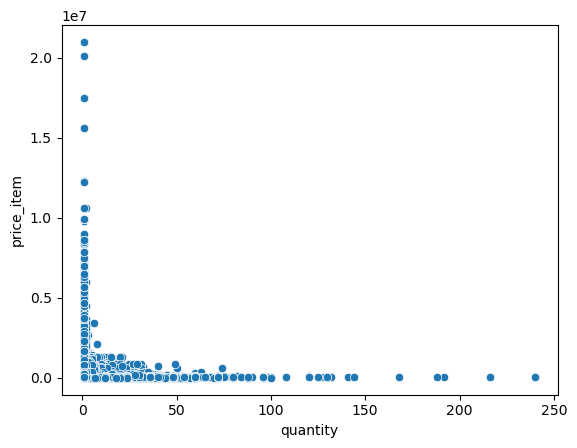

In [ ]:
df = (
    item_purchase_df.select(
        pl.col(['price_item', 'quantity'])
    )
    .collect()
)

sns.scatterplot(data=df, x='quantity', y='price_item')

#### Loại hàng nào mang lại nhiều lợi nhuận hơn

<Axes: xlabel='revenue', ylabel='category_l1'>

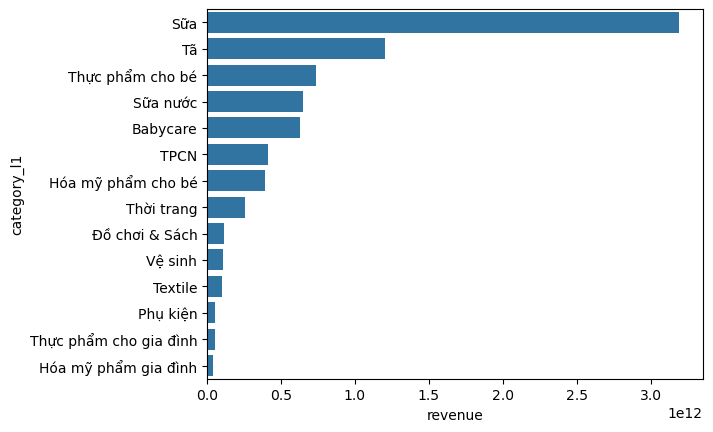

In [9]:
df = (
    item_purchase_df.select(
        pl.col(['category_l1', 'total_value'])
    )
    .group_by(
        pl.col('category_l1')
    )
    .agg(
        pl.col('total_value').sum().alias('revenue')
    )
    .sort(
        pl.col('revenue'),
        descending=True
    )
    .collect()
)
sns.barplot(data=df, x='revenue', y='category_l1')

### Item + Purchase + User

In [5]:
df = (
    full_df.filter(
        pl.col('gender') != 'Khác'
    )
    .with_columns(
        pl.when(pl.col('gender') == 'Nam').then(pl.lit(0))
        .otherwise(pl.lit(1))
        .alias('gender_encoded')
    )
    .select(
        pl.col(['total_value', 'quantity', 'price_item', 'gender_encoded'])
    )
    .collect()
)

corr = df.to_pandas().corr()

<Axes: >

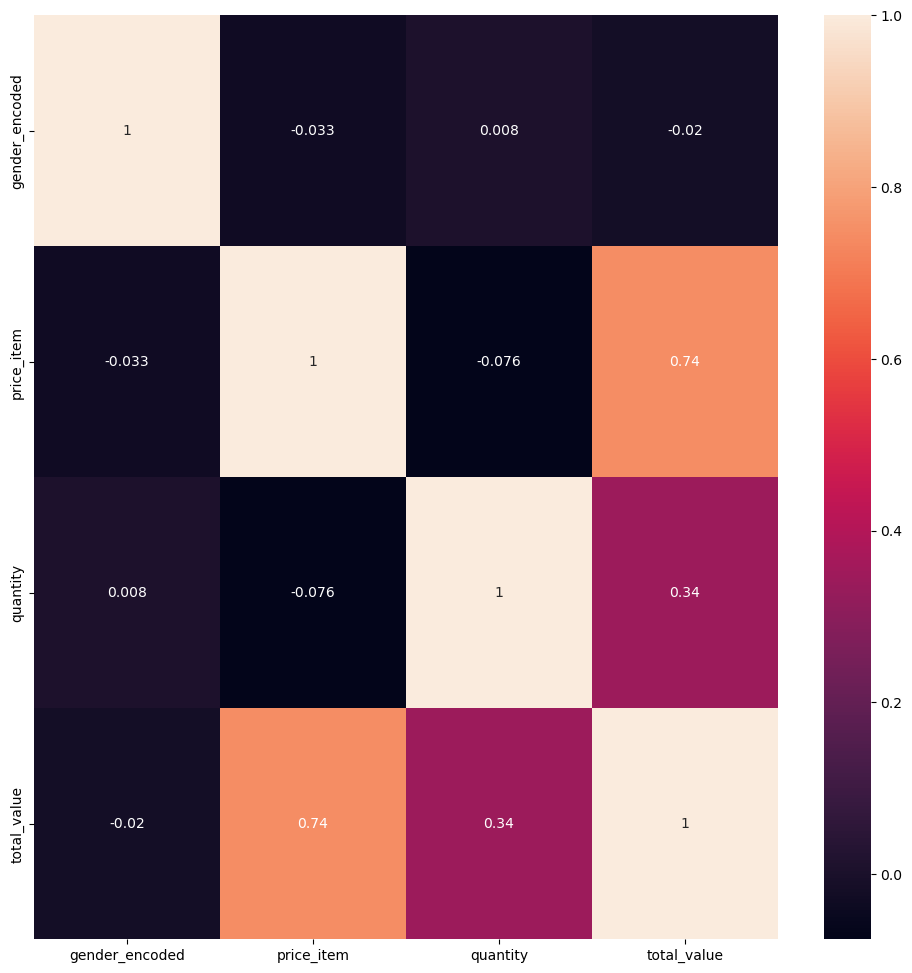

In [6]:
plt.figure(figsize=(12,12))
val_sorted = corr.loc[sorted(corr.index), sorted(corr.columns)]
sns.heatmap(val_sorted, annot=True)